# OpenCV 
## cifar-10 이미지 처리

MNIST와 마찬가지로 CIFAR-10은 컴퓨터 비전 및 기계 학습 분야에서 이미지 분류를 위한 또 다른 표준 벤치마크 데이터 집합으로 간주됩니다. CIFAR-10은 60,000개 32x32x3(RGB) 이미지로 구성되어 있으며, 그 결과 피처 벡터 치수는 3072입니다
  
이름에서 알 수 있듯이 CIFAR-10은 비행기, 자동차, 새, 고양이, 사슴, 개, 개구리, 말, 선박 및 트럭을 포함한 10 개의 클래스로 구성됩니다. MNIST에서 97% 이상 의 분류 정확도 모델을 학습하는 것은 매우 쉽지만 CIFAR-10(그리고 더 큰 형제CIFAR-100)에 대한 모델을 얻는 것이 훨씬 어렵습니다. 


In [2]:
import numpy as np
import pandas as pd

import os
import tarfile
import urllib.request
import shutil

import tensorflow as tf
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.datasets import cifar10

%matplotlib inline

In [3]:
(mnist_x, mnist_y), _ = tf.keras.datasets.mnist.load_data()
print(mnist_x.shape, mnist_y.shape)

(60000, 28, 28) (60000,)


In [4]:
(cifar_x, cifar_y), _ = tf.keras.datasets.cifar10.load_data()
print(cifar_x.shape, cifar_y.shape)

(50000, 32, 32, 3) (50000, 1)


[5 0 4 1 9 2 1 3 1 4]


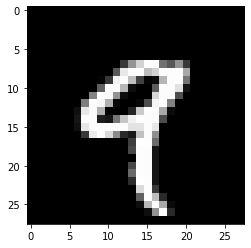

In [5]:
print(mnist_y[0:10]) # 처음 10개의 이미지 label 출력 
plt.imshow(mnist_x[4], cmap='gray') #4번째 사진


[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]


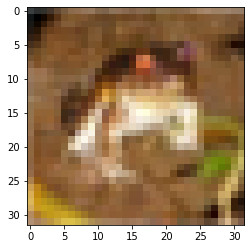

In [6]:
print(cifar_y[0:10]) # 처음 10개의 이미지 label 출력
import matplotlib.pyplot as plt
plt.imshow(cifar_x[0]) 

index = 0 의 라벨값은 6이다. 

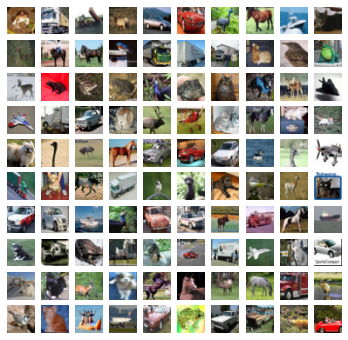

In [7]:
plt.figure(figsize=(6,6))
for i in range(100):
    some_digit2 = cifar_x[i]
    
    plt.subplot(10,10,i+1)
    plt.imshow(some_digit2, cmap="binary")
    plt.axis("off")
plt.show()

데이터 들어가있는 사진 일부

In [8]:
(x_tr, y_tr), (x_test, y_test) = cifar10.load_data()

In [9]:
x_train = x_tr[:40000]
y_train = y_tr[:40000]
x_val = x_tr[40000:]
y_val = y_tr[40000:] #훈련용과 검증용데이터 
#훈련용은 4만개 검증용은 만개

In [10]:
x_train.shape, y_train.shape

((40000, 32, 32, 3), (40000, 1))

In [11]:
x_val.shape, y_val.shape

((10000, 32, 32, 3), (10000, 1))

In [12]:
x_test.shape, y_test.shape

((10000, 32, 32, 3), (10000, 1))

데이터는 ​4D 텐서로 첫번째 차원은 인덱스, 두번째와 세번째 차원은 이미지의 크기(가로 x 세로)를 의미하고 네번째 차원은 RGB채널(빨강,초록,파랑)을 의미.(흑백의 경우는 1)

신경망이 입력값이 -1에서 1사이의 값일 때 가장 작동이 잘되기 때문에 각 샘플을 255.0으로 나눈다

# DNN을 이용한 cifar-10 이미지 처리

In [13]:
x_train = x_train.astype('float32') / 255.0
x_val = x_val.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [14]:
n_class = 10
y_train = to_categorical(y_train,n_class)
y_val = to_categorical(y_val,n_class)
y_test = to_categorical(y_test,n_class)

https://github.com/kimyoon-young/image-classification/blob/master/cifar10_cnn_train.py

https://blog.naver.com/jape908/221811660065

In [15]:
from keras.models import *
from keras.layers import *

In [16]:
input_layer = Input(shape=(32,32,3))
x = Flatten()(input_layer)
x = Dense(units = 150, activation = 'relu')(x)
x = Dense(units = 100, activation = 'relu')(x)
output_layer = Dense(units = 10, activation = 'softmax')(x)
model= Model(input_layer , output_layer)

In [17]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 150)               460950    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               15100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 477,060
Trainable params: 477,060
Non-trainable params: 0
_________________________________________________________________


In [18]:
from keras.optimizers import *

In [19]:
opt = Adam(lr = .0005)
model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics=['acc'])

옵티마이저로는 가장 무난한 'adam'을 사용하였고 loss의 경우는 3개 이상의 범주를 예측하는 문제이므로 'categorical_crossentropy'를 사용하였습니다.


In [20]:
#model trainning
history = model.fit(x_train, y_train, batch_size = 32, epochs = 20 , shuffle = True
                   , validation_data= (x_val, y_val))

Epoch 1/20
1000/1000 [==============================] - 5s 4ms/step - loss: 2.0163 - acc: 0.2637 - val_loss: 1.8325 - val_acc: 0.3396
Epoch 2/20
1000/1000 [==============================] - 4s 4ms/step - loss: 1.7697 - acc: 0.3647 - val_loss: 1.6927 - val_acc: 0.3983
Epoch 3/20
1000/1000 [==============================] - 4s 4ms/step - loss: 1.6705 - acc: 0.4023 - val_loss: 1.6604 - val_acc: 0.4144
Epoch 4/20
1000/1000 [==============================] - 4s 4ms/step - loss: 1.6167 - acc: 0.4239 - val_loss: 1.6457 - val_acc: 0.4099
Epoch 5/20
1000/1000 [==============================] - 4s 4ms/step - loss: 1.5832 - acc: 0.4342 - val_loss: 1.5905 - val_acc: 0.4315
Epoch 6/20
1000/1000 [==============================] - 4s 4ms/step - loss: 1.5331 - acc: 0.4537 - val_loss: 1.6048 - val_acc: 0.4294
Epoch 7/20
1000/1000 [==============================] - 4s 4ms/step - loss: 1.4997 - acc: 0.4695 - val_loss: 1.5580 - val_acc: 0.4454
Epoch 8/20
1000/1000 [==============================] - 4s 4ms

batch_size는 훈련 반복마다 네트워크에 전달되는 샘플의 개수입니다.   epochs는 네트워크가 훈련 세트 전체에 대해 반복해서 훈련할 횟수입니다.   shuffle = True의 경우 훈련 반복마다 배치를 훈련 세트에서 중복 없이 랜덤하게 뽑는 방식입니다.  

In [21]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.4880 - acc: 0.4743


[1.4880050420761108, 0.47429999709129333]

In [22]:
pic = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])
pred = model.predict(x_test)

In [23]:
pred_pic = pic[np.argmax(pred, axis = -1)]

In [24]:
real = pic[np.argmax(y_test, axis = -1)]

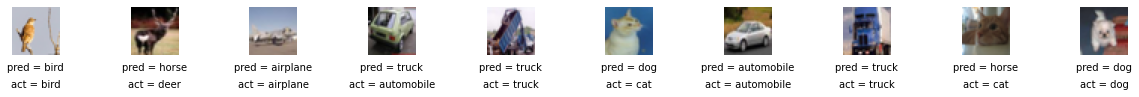

In [25]:
n = 10
indices = np.random.choice(range(len(x_test)), n)

fig =  plt.figure(figsize = (20,6))
fig.subplots_adjust(wspace=1.5, hspace = .4)

for i, idx in enumerate(indices):
    picture = x_test[idx]
    ax = fig.add_subplot(1, 10, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(pred_pic[idx]), fontsize = 10, ha = 'center', transform = ax.transAxes)
    ax.text(0.5, -0.7, 'act = ' + str(real[idx]), fontsize = 10, ha= 'center', transform = ax.transAxes)
    ax.imshow(picture)
    


In [26]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

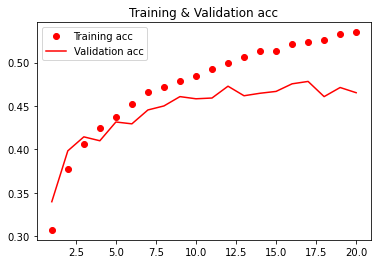

In [27]:
plt.plot(epochs, acc, 'ro', label = 'Training acc')
plt.plot(epochs, val_acc, 'r', label = 'Validation acc')
plt.title('Training & Validation acc')
plt.legend()
plt.show()

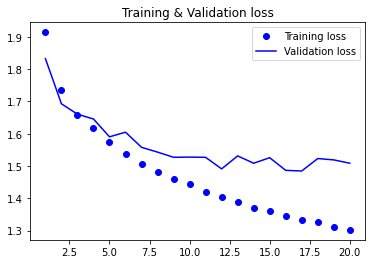

In [28]:
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training & Validation loss')
plt.legend()
plt.show()

https://antilibrary.org/1980 케라스 CNN 모델 평가  
https://blog.naver.com/joseb1234/222251768111 R CNN 모델 평가